# Decision Tree

In [19]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

try:
    import graphviz # pip install 
except:
    !pip install graphviz
    import graphviz


In [20]:
DATASET_DIR = os.path.join(os.path.dirname(os.getcwd()), 'datasets')

In [21]:
red_file = os.path.join(DATASET_DIR, 'winequality-red.csv')
white_file = os.path.join(DATASET_DIR, 'winequality-white.csv')

In [22]:
wine_red = pd.read_csv(red_file, sep=';')
wine_white = pd.read_csv(white_file, sep=';')

In [23]:
wine_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [25]:
len(wine_red), len(wine_white)

(1599, 4898)

## Classification

### 1. Feature_n: 2(volatile acidity, sulphates), Binary Problem

In [28]:
new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)


In [29]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [30]:
wine.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [31]:
X = wine[['volatile acidity', 'sulphates']]
y = wine['is_red']

##### split train&test

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['is_red'], random_state=42, test_size=.2)

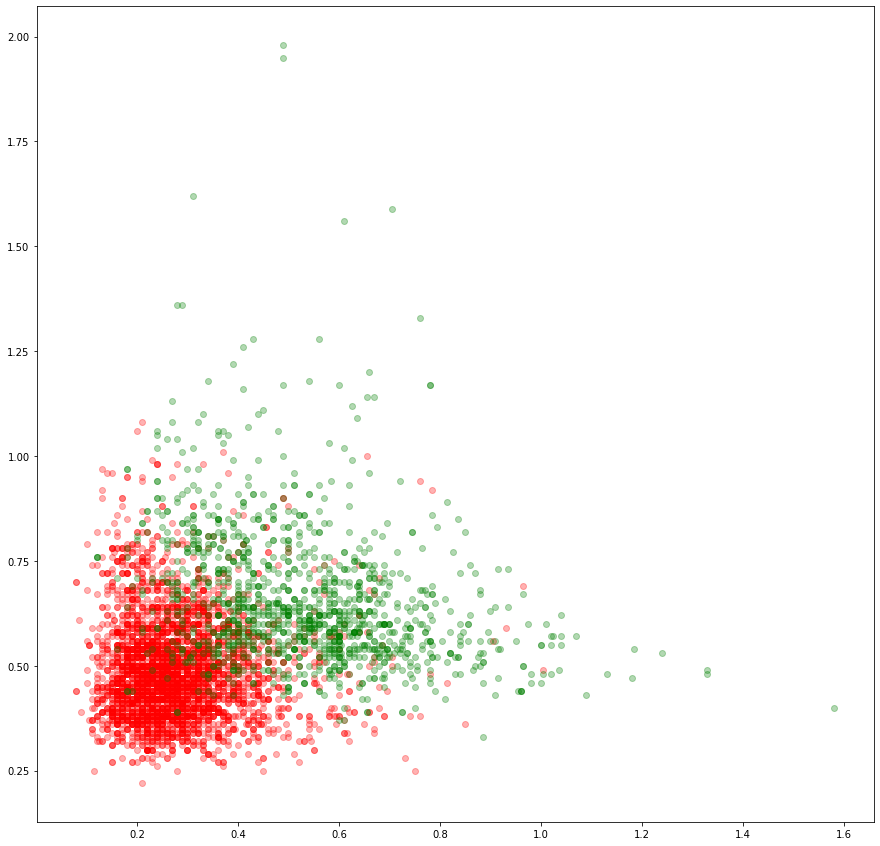

In [34]:
red_index = train_y[train_y==1].index
white_index = train_y[train_y==0].index
plt.figure(figsize=(15,15))
plt.scatter(x=train_X.loc[white_index, 'volatile acidity'], y=train_X.loc[white_index, 'sulphates'], color='r', alpha=0.3)

plt.scatter(x=train_X.loc[red_index, 'volatile acidity'], y=train_X.loc[red_index, 'sulphates'], color='g',  alpha=0.3)

plt.show()

In [35]:
from sklearn import tree
# 

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# random_state: 난수값

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""


clf = tree.DecisionTreeClassifier('entropy', max_depth=2)
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [474]:
dot_data = tree.export_graphviz(
    clf, out_file=None, 
    max_depth=2, feature_names=list(X.columns.values), 
    filled=True, rounded=True
)
graphviz.Source(dot_data)

Error: <stdin>: syntax error in line 1 near 'None'


CalledProcessError: Command '['dot', '-Tsvg']' returned non-zero exit status 1.

In [36]:
clf.classes_

array([0, 1], dtype=int64)

In [37]:
clf.max_features_

2

In [39]:
clf.n_features_

2

In [40]:
clf.get_n_leaves()

4

In [41]:
# Returns the mean accuracy on the given test data and labels.
clf.score(train_X,train_y)

0.8841639407350395

In [57]:
clf.score(test_X, test_y)

0.8930769230769231

In [58]:
train_X.iloc[1]

volatile acidity    0.58
sulphates           0.59
Name: 196, dtype: float64

In [281]:
# X_index, node_id
m = clf.decision_path(train_X.iloc[:1]).toarray()
# type(m)
# print(clf.decision_path(train_X.iloc[:1]))

In [282]:
# (a, b) = (X_index, node_index)
clf.predict(train_X.iloc[:1])

array([6], dtype=int64)

In [285]:
# (a, b) = (X_index, node_index)
m = clf.decision_path(train_X)


In [286]:
# Predict class log-probabilities of the input samples X.
clf.predict_log_proba(train_X)

C:\ProgramData\Anaconda3\envs\study\lib\site-packages\sklearn\tree\tree.py:890: RuntimeWarning: divide by zero encountered in log
  return np.log(proba)


array([[-inf, -inf, -inf,   0., -inf, -inf],
       [-inf, -inf,   0., -inf, -inf, -inf],
       [-inf, -inf, -inf,   0., -inf, -inf],
       ...,
       [-inf, -inf,   0., -inf, -inf, -inf],
       [-inf, -inf,   0., -inf, -inf, -inf],
       [-inf, -inf, -inf,   0., -inf, -inf]])

In [287]:
# The predicted class probability is the fraction of samples of the same class in a leaf.
clf.predict_proba(train_X)

array([[0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [288]:
clf.get_depth()

19

In [311]:
clf.tree_

In [312]:
clf.tree_.n_leaves

297

In [313]:
clf.tree_.max_depth

19

array([1.71011986, 1.38207114, 1.16349667, 0.86149674, 0.5395046 ,
       1.44881564, 0.91829583, 0.        , 0.        , 0.81127812,
       0.        , 0.        , 0.33015683, 0.61800386, 0.        ,
       1.05298158, 0.        , 1.40563906, 0.91829583, 0.        ,
       0.        , 0.72192809, 0.        , 0.        , 0.        ,
       1.34706498, 0.93211157, 0.39124356, 0.        , 0.        ,
       0.8812909 , 0.        , 0.97095059, 0.        , 0.        ,
       1.32501121, 1.14883485, 0.        , 0.65002242, 0.        ,
       0.        , 0.        , 1.19569928, 1.26323164, 1.15151972,
       1.20330646, 1.13494388, 0.65002242, 0.        , 0.        ,
       1.09864755, 1.21974849, 0.        , 1.20080487, 0.        ,
       1.27346173, 1.12260797, 0.        , 0.89294274, 0.32275696,
       1.        , 0.        , 0.        , 0.        , 1.5       ,
       0.        , 1.        , 0.        , 0.        , 1.1433201 ,
       1.24067053, 0.        , 0.54356444, 1.        , 0.     

In [74]:
train_X.iloc[:10]

,volatile acidity,sulphates
3123,0.210,0.39
196,0.580,0.59
1704,0.130,0.35
3417,0.260,0.44
4422,0.270,0.48
3876,0.140,0.39
3378,0.150,0.69
439,0.620,0.60
834,0.685,0.47
2330,0.250,0.47


In [75]:
clf.apply(train_X.iloc[:10]) # node의 위치

array([2, 6, 2, 2, 2, 2, 3, 6, 5, 2], dtype=int64)

In [76]:
clf.predict(X)

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

### parameter 조정 # depth3

In [78]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""
clf = tree.DecisionTreeClassifier('entropy', max_depth=3)
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

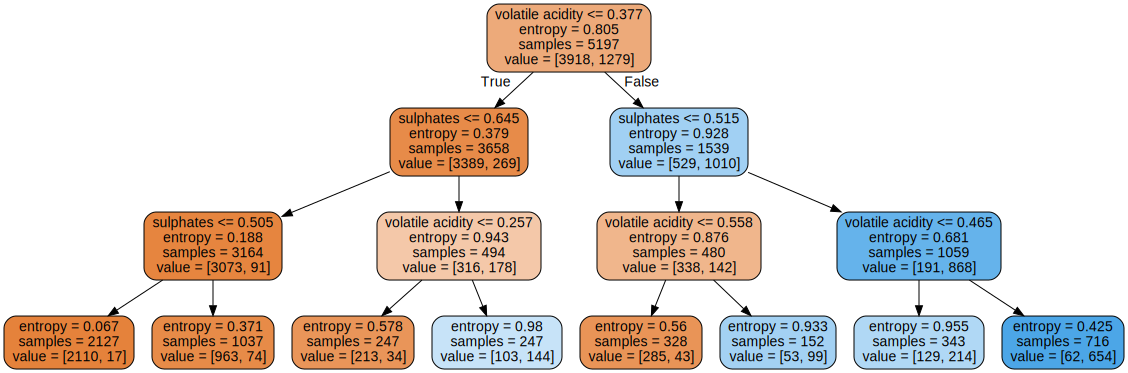

In [79]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=3, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [80]:
clf.score(train_X,train_y)

0.9009043679045603

In [81]:
clf.score(test_X, test_y)

0.9084615384615384

In [82]:
from sklearn import tree


clf = tree.DecisionTreeClassifier('entropy', max_depth=5)
clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [83]:
clf.score(train_X,train_y), clf.score(test_X, test_y)

(0.9189917259957668, 0.9161538461538462)

In [84]:
clf.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [85]:
# Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. 
# The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. 
# The higher the value the more important the feature.

X.columns, clf.feature_importances_

(Index(['volatile acidity', 'sulphates'], dtype='object'),
 array([0.66540696, 0.33459304]))

In [87]:
import sklearn
sklearn.__version__

'0.21.2'

In [86]:
# clf.get_n_leaves()

31

### 파라미터 조정 # max_leaf_nodes

In [88]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수
"""
clf = tree.DecisionTreeClassifier(
    'entropy',  
    max_depth=3,
    min_samples_split=500
)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=500,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [89]:
clf.score(train_X, train_y)

0.8841639407350395

In [90]:
clf.score(test_X, test_y)

0.8930769230769231

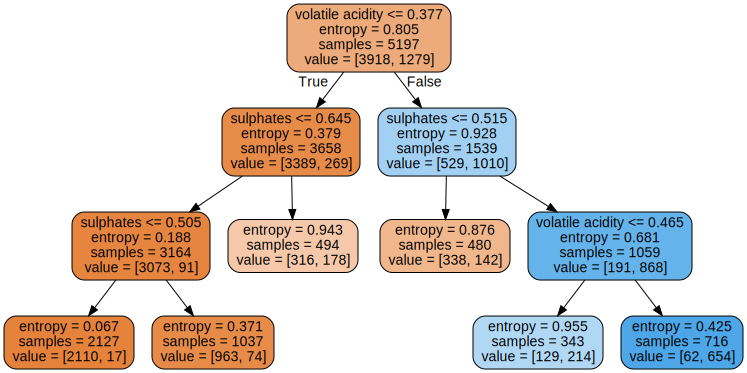

In [91]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=5, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

# 실습1: depth가 5이고  max_leaf_nodes가 10인 트리를 만들고 학습시키시오.


In [93]:
clf = tree.DecisionTreeClassifier(
    'entropy',
    max_depth=5,
    max_leaf_nodes=10)
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=10,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [102]:
clf.score(train_X, train_y), clf.score(test_X, test_y)

(0.9059072541851068, 0.9123076923076923)

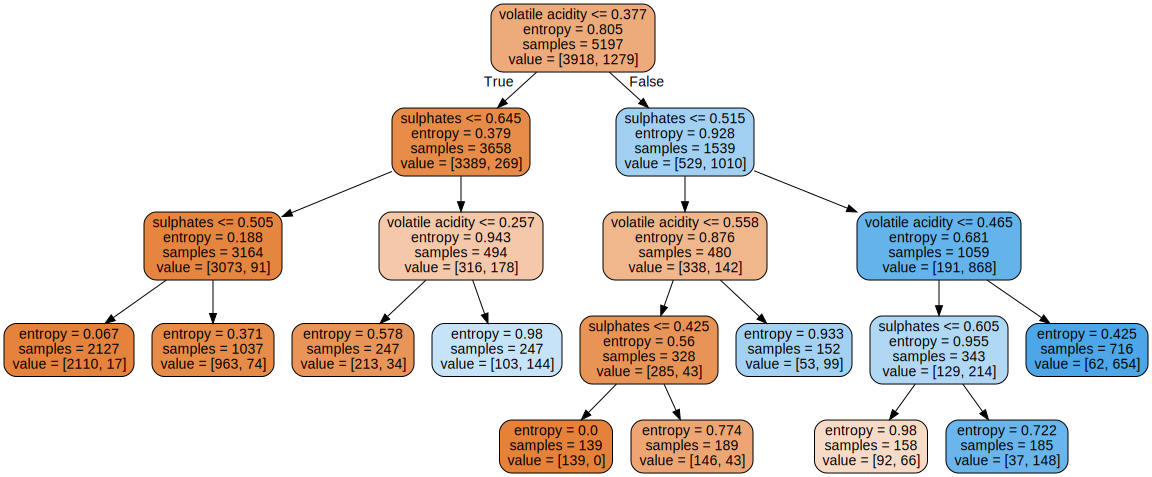

In [103]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=5, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [106]:
clf.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [107]:
clf.predict_proba(test_X)

array([[0.92864031, 0.07135969],
       [0.86234818, 0.13765182],
       [0.86234818, 0.13765182],
       ...,
       [0.92864031, 0.07135969],
       [0.92864031, 0.07135969],
       [0.77248677, 0.22751323]])

$$Gini = 1-\sum_jp_j^2$$

### Overfitting  # 이전 예제에 비해 비교적

### 1. depth제한 X:  Feature_n: 2(volatile acidity, sulphates), Binary Problem

In [114]:
clf = tree.DecisionTreeClassifier('entropy')
clf.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

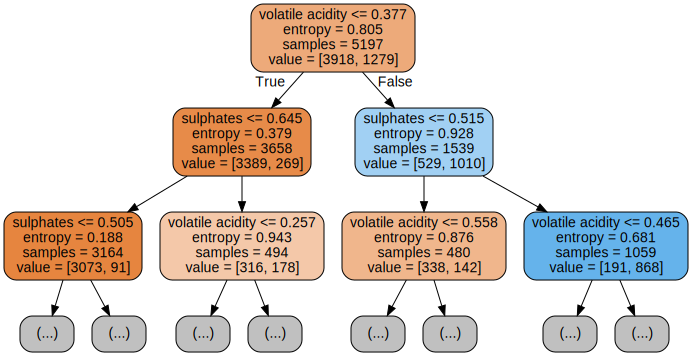

In [116]:
dot_data = tree.export_graphviz(clf, max_depth=2, out_file=None, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [119]:
clf.score(train_X, train_y)

0.9609390032711179

In [120]:
clf.score(test_X, test_y)

0.9038461538461539

In [113]:
clf.classes_

array([0, 1], dtype=int64)

In [121]:
clf.max_features_

2

In [ ]:
clf.n_classes_

In [123]:
clf.n_features_

2

In [122]:
clf.get_n_leaves()

631

In [124]:
clf.get_depth()

21

In [125]:
# Returns the mean accuracy on the given test data and labels.
clf.score(train_X,train_y)

0.9609390032711179

In [126]:
clf.score(test_X, test_y)

0.9038461538461539

In [ ]:
train_X.iloc[1]

In [139]:
train_X.loc[0,:]

volatile acidity    0.70
sulphates           0.56
Name: 0, dtype: float64

In [141]:
train_X.head(2)

,volatile acidity,sulphates
3123,0.21,0.39
196,0.58,0.59


In [142]:
# 
# (a, b) = (X_index, node_index)
m = clf.decision_path(train_X)
print(m)

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 7)	1
  (0, 8)	1
  (0, 9)	1
  (0, 10)	1
  (1, 0)	1
  (1, 594)	1
  (1, 796)	1
  (1, 1016)	1
  (1, 1148)	1
  (1, 1149)	1
  (1, 1150)	1
  (1, 1151)	1
  (1, 1152)	1
  (1, 1160)	1
  (1, 1170)	1
  (1, 1171)	1
  (2, 0)	1
  (2, 1)	1
  (2, 2)	1
  :	:
  (5193, 83)	1
  (5194, 0)	1
  (5194, 1)	1
  (5194, 2)	1
  (5194, 3)	1
  (5194, 4)	1
  (5194, 5)	1
  (5195, 0)	1
  (5195, 1)	1
  (5195, 335)	1
  (5195, 427)	1
  (5195, 503)	1
  (5195, 504)	1
  (5195, 505)	1
  (5195, 506)	1
  (5195, 510)	1
  (5196, 0)	1
  (5196, 1)	1
  (5196, 2)	1
  (5196, 3)	1
  (5196, 4)	1
  (5196, 6)	1
  (5196, 26)	1
  (5196, 28)	1
  (5196, 42)	1


In [ ]:
# Predict class log-probabilities of the input samples X.
clf.predict_log_proba(X)

In [ ]:
# The predicted class probability is the fraction of samples of the same class in a leaf.
clf.predict_proba(X)

In [ ]:
clf.get_depth()

In [ ]:
clf.apply(X.loc[:10]) # node의 위치

In [ ]:
clf.predict(X)

# 2. Feature: All, y= red or white

In [143]:
new_red = wine_red.copy()
new_red['is_red'] = 1
new_white = wine_white.copy()
new_white['is_red'] = 0

wine = new_red.append(new_white, ignore_index=True)

In [144]:
wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1


In [145]:
wine.tail(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,is_red
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [146]:
X = wine.drop('is_red', axis=1)
y = wine['is_red']

In [147]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=wine['is_red'], random_state=42, test_size=.2)

In [226]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', 
                                  random_state=42, 
                                  max_features=3, 
                                  max_depth=100)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=100,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [227]:
clf.score(train_X, train_y)

0.9998075812969021

In [228]:
clf.score(test_X, test_y)

0.99

In [229]:
clf.get_depth()

12

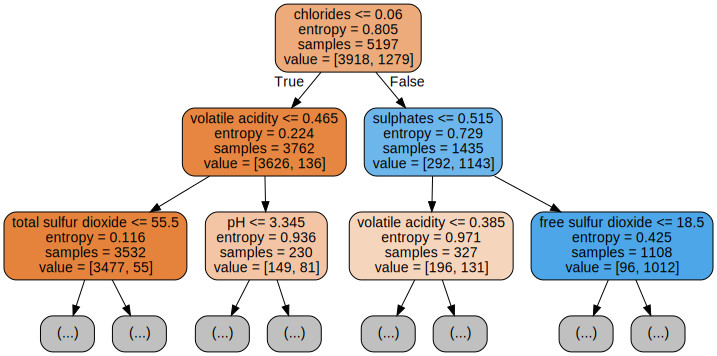

In [230]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [ ]:
list(zip(X.columns, clf.feature_importances_))

In [ ]:
clf.classes_

In [ ]:
clf.max_features_

In [ ]:
clf.n_classes_

In [ ]:
clf.n_features_

In [ ]:
clf.get_n_leaves()

# 3. Quality 예측

In [314]:
new_red = wine_red.copy()
new_white = wine_white.copy()

In [315]:
X = new_red.drop('quality', axis=1)
y = new_red['quality']

In [316]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [317]:
train_y.head()

1542    6
1558    5
344     6
924     5
971     6
Name: quality, dtype: int64

In [332]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('gini')

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [333]:
train_y.value_counts()

5    545
6    510
7    159
4     42
8     15
3      8
Name: quality, dtype: int64

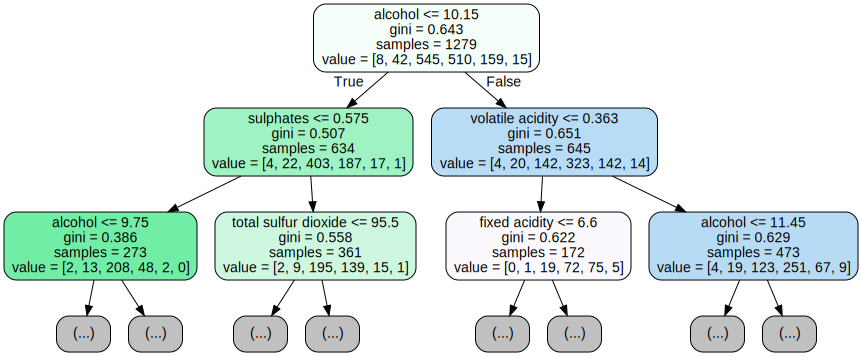

In [334]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [335]:
clf.score(train_X, train_y)

1.0

In [337]:
clf.score(test_X, test_y)

0.60625

In [339]:
clf.tree_.max_depth

21

In [340]:
list(zip(X.columns, clf.feature_importances_))

[('fixed acidity', 0.06283612709492922),
 ('volatile acidity', 0.11215944666970311),
 ('citric acid', 0.06511604588520502),
 ('residual sugar', 0.06341135673802553),
 ('chlorides', 0.061216741421694365),
 ('free sulfur dioxide', 0.047325170329928966),
 ('total sulfur dioxide', 0.12024848934262317),
 ('density', 0.07280492453166233),
 ('pH', 0.08041320720696658),
 ('sulphates', 0.14202612941437417),
 ('alcohol', 0.17244236136488758)]

In [341]:
clf.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [342]:
clf.max_features_

11

In [343]:
clf.n_classes_

6

In [344]:
clf.n_features_

11

In [345]:
clf.tree_.n_leaves


339

In [269]:
clf.get_depth()

19

# 실습1. white wine에 대해서 Quality 예측

In [374]:
X = new_white.drop('quality', axis=1)
y = new_white['quality']

In [384]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [410]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', 
                                  random_state=0)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

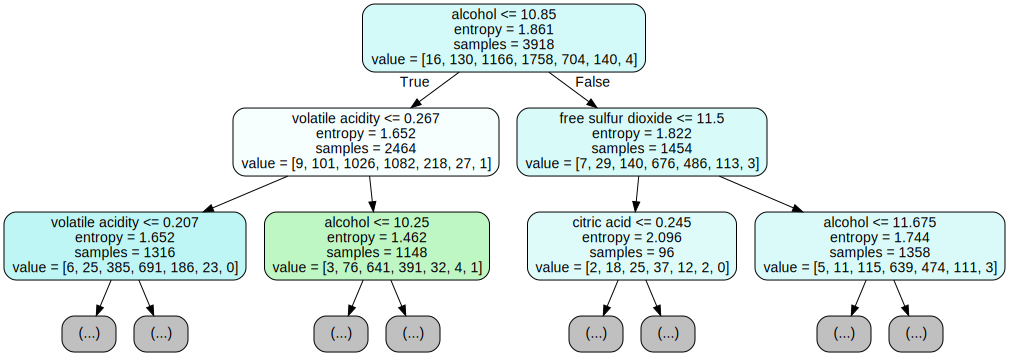

In [411]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [412]:
clf.score(train_X, train_y)

1.0

In [413]:
clf.score(test_X, test_y)

0.6214285714285714

In [414]:
clf.tree_.max_depth

23

In [415]:
list(zip(X.columns, clf.feature_importances_))

[('fixed acidity', 0.06337465874717897),
 ('volatile acidity', 0.10243792415591456),
 ('citric acid', 0.07257098119219334),
 ('residual sugar', 0.08803650579389526),
 ('chlorides', 0.07880139060295413),
 ('free sulfur dioxide', 0.11724772362889596),
 ('total sulfur dioxide', 0.09154026678888438),
 ('density', 0.0820061108712275),
 ('pH', 0.07928249422250078),
 ('sulphates', 0.07274712096722222),
 ('alcohol', 0.15195482302913293)]

In [356]:
clf.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [342]:
clf.max_features_

11

In [343]:
clf.n_classes_

6

In [344]:
clf.n_features_

11

In [345]:
clf.tree_.n_leaves


339

In [269]:
clf.get_depth()

19

# 실습2. 전체 와인셋(red+ white)에 대해 quality 예측

In [450]:
new_red = wine_red.copy()
new_white = wine_white.copy()

wine = new_red.append(new_white, ignore_index=True)

In [451]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [452]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [453]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', random_state=0)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

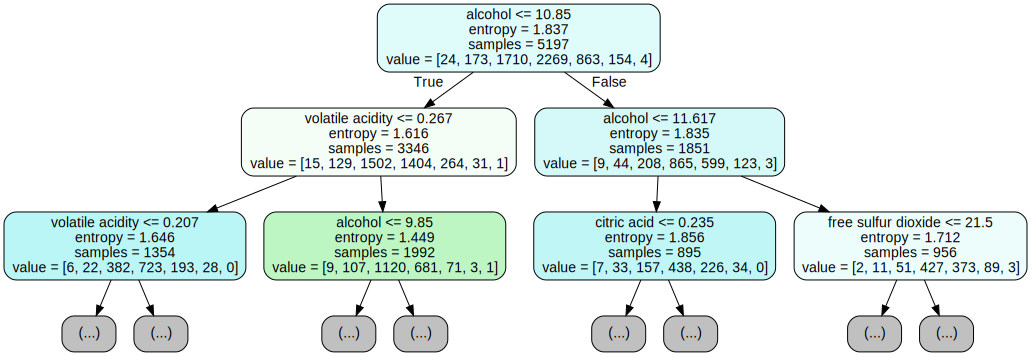

In [454]:
dot_data = tree.export_graphviz(clf, out_file=None, max_depth=2, feature_names=list(X.columns.values), filled=True, rounded=True)
graphviz.Source(dot_data)

In [456]:
clf.score(train_X, train_y)

1.0

In [457]:
clf.score(test_X, test_y)

0.6053846153846154

In [458]:
clf.tree_.max_depth

25

In [428]:
list(zip(X.columns, clf.feature_importances_))

[('fixed acidity', 0.06957478233276009),
 ('volatile acidity', 0.11176538569824963),
 ('citric acid', 0.08150086634846478),
 ('residual sugar', 0.07674520277498954),
 ('chlorides', 0.07831096068690979),
 ('free sulfur dioxide', 0.08784699396671765),
 ('total sulfur dioxide', 0.09095037698932752),
 ('density', 0.06068498410858165),
 ('pH', 0.08466020437836452),
 ('sulphates', 0.09054300498106997),
 ('alcohol', 0.16741723773456493)]

In [429]:
clf.classes_

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [430]:
clf.max_features_

11

In [431]:
clf.n_classes_

7

In [432]:
clf.n_features_

11

In [459]:
clf.tree_.n_leaves


1330

In [460]:
clf.tree_.max_depth

25

25

# 실습3. 전체 와인셋(red+ white)에 대해 depth가(2부터 20까지 중에 최적 depth 찾기)

In [438]:
new_red = wine_red.copy()
new_white = wine_white.copy()

wine = new_red.append(new_white, ignore_index=True)

X = wine.drop('quality', axis=1)
y = wine['quality']

from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [439]:
from sklearn import tree

"""
DecisionTreeClassifier(criterion=’gini’, splitter=’best’, max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                       min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)

# scikit-learn uses an optimised version of the CART algorithm.
                       
# criterion: entropy or gini
The function to measure the quality of a split. 
Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

# max_depth : int or None, optional (default=None)
The maximum depth of the tree. 
If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

# random_state: 난수값

# min_samples_split: 분할 되기 위해 노드가 가져야 하는 최소 샘플 수 
# min_samples_leaf: 리프 노드가 가지고 있어야 할 최소 샘플 수
# max_leaf_nodes: 리프 노드의 최대 수
# max_features: 노드에서 분할에 사용할 특성의 최대 수 

# max_features : int, float, string or None, optional (default=”auto”)
The number of features to consider when looking for the best split:

If int, then consider max_features features at each split.
If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
If “auto”, then max_features=sqrt(n_features).
If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
If “log2”, then max_features=log2(n_features).
If None, then max_features=n_features.

"""
clf = tree.DecisionTreeClassifier('entropy', 
                                  random_state=0)

clf.fit(train_X, train_y)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [447]:
max_score = -1
best_clf = None

for x in range(1, 90):
    clf = tree.DecisionTreeClassifier('entropy', 
                                  random_state=0, max_depth=x)
    clf.fit(train_X, train_y)
    
    score = clf.score(test_X, test_y)
    
    if score > max_score:
        best_clf = clf
        max_score= score

In [448]:
max_score

0.6084615384615385

In [449]:
best_clf

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=22,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [462]:
X = wine.drop('quality', axis=1)
y = wine['quality']

In [463]:
train_X, test_X, train_y, test_y = train_test_split(X, y, stratify=y, random_state=42, test_size=.2)

In [464]:
from sklearn import tree
import numpy

clf = tree.DecisionTreeClassifier(
    'gini', 
    random_state=42, 
    max_features='auto')

clf2 = tree.DecisionTreeClassifier(
    'entropy', random_state=42, max_features=10
)

clf3 = tree.DecisionTreeClassifier(
    'entropy', random_state=42, max_features=8
)

clf4 = tree.DecisionTreeClassifier(
    'entropy', random_state=42, max_features=5
)
clf5= tree.DecisionTreeClassifier(
    'entropy', random_state=42, max_features=3
)
clf.fit(train_X, train_y)
clf2.fit(train_X, train_y)
clf3.fit(train_X, train_y)
clf4.fit(train_X, train_y)
clf5.fit(train_X, train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [467]:
print(clf.tree_.max_depth)
print(clf2.tree_.max_depth)
print(clf3.tree_.max_depth)
print(clf4.tree_.max_depth)
print(clf5.tree_.max_depth)

26
30
29
25
25


In [469]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [470]:
len(wine)

6497